# Exam 02: Summary

In [1]:
%matplotlib inline

In [2]:
import requests
import matplotlib.pyplot as plt

In [3]:
EXAM02_URL = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/exam02.csv'

def load_data(url=EXAM02_URL):
    ''' Loads CSV data from URL '''
    return [[float(d) for d in row.strip().split(',')] for row in requests.get(url).text.splitlines()]

In [4]:
SECTION_MAX = [6, 6, 10, 6, 8]

def plot_sections(data):
    ''' Plot section percentages for given data '''
    section_labels  = ['Code Snippets', 'Data Processing', 'Functional', 'Concurrency / Parallelism', 'Translations']
    section_numbers = range(len(section_labels))
    section_data    = [[] for _ in section_labels]
    
    # Separate scores from each student into section lists and compute percentage
    for row in data:
        for index, section in enumerate(section_data):
            section.append(row[index] * 100.0 / SECTION_MAX[index])
    
    # Compute section averages
    section_averages = [sum(section) / len(section) for section in section_data]
        
    # Create bar graph of section averages
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.bar(section_numbers, section_averages, color='rgbcymk')
    plt.xticks(section_numbers, section_labels)
    plt.ylabel('Percentage')
    plt.xlabel('Section')

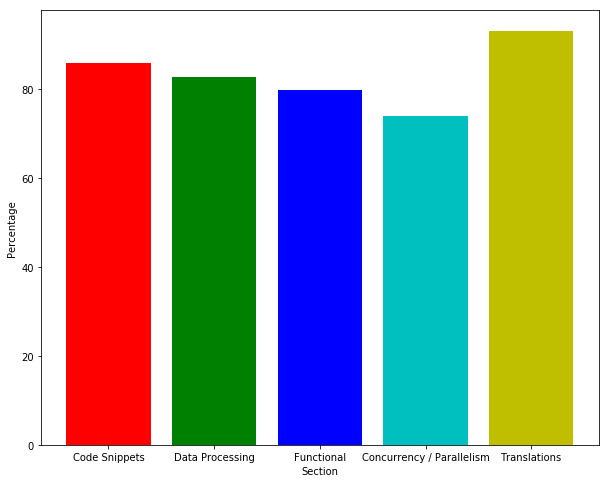

In [5]:
plot_sections(load_data())

In [6]:
def plot_scores(data, score_max=sum(SECTION_MAX)):
    ''' Plot histograph of scores data '''
    
    # Compute score percentage
    scores = [sum(row) * 100.0 / score_max for row in data]

    # Construct histogram of scores
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    ax.hist(scores, bins=range(25, 105, 5), color='g')
    plt.grid(True)
    plt.ylabel('Number of Students')
    plt.xlabel('Percentage')
    
 

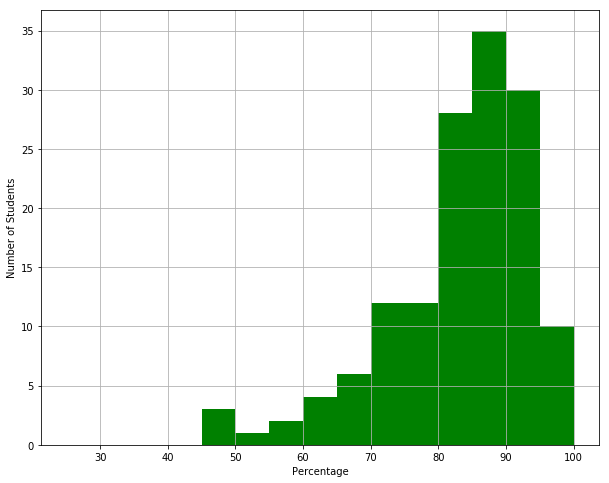

In [7]:
plot_scores(load_data())

In [8]:
scores = [sum(row) * 100.0 / sum(SECTION_MAX) for row in load_data()]
print('Minimum: {:.2f}'.format(min(scores)))
print('Average: {:.2f}'.format(sum(scores) / len(scores)))
print('Maximum: {:.2f}'.format(max(scores)))

Minimum: 45.83
Average: 83.21
Maximum: 100.00


# Notes


1. Instead of `re.search('man', hero)`, you can just do `'man' in hero`.  In
fact, that is how you perform a search on any Python data structure (list,
dict, set, string, etc.).  This is not only simpler, it is probably more
efficient.

    <br>

2. Directly index nested data structures.  Instead of:

        for key, dict in heroes.items():
            if 'marvel' in dict.keys():
            for hero in dict['marvel']:
                print(hero)

    Do this instead:

        for hero in heroes['universes']['marvel']:
            print(hero)

    Moreover, if you want to search a `dict`, do not do:

        if 'marvel' in dict.keys():

    Just do:

        if 'marvel' in dict:

    When you do dict.keys() you are creating a new `list` and forcing a linear
    search rather than taking advantage of the `dict`'s built-in constant time
    search.

    The same goes for the following:

        for key in dict.keys():	# NOPE
            print(key)

        for key in dict:	# YEAH
            print(key)

    Again, dict.keys() creates a new list, which you are just iterating over
    and discarding.  You don't need to do that to either search or iterate
    through a dictionary, so avoid using that method.

    <br>

3. Avoid unnecessary list comprehensions.  For instance, this is unnecessary:

        [print(x) for x in stuff]

    You are just printing and don't care about the result.. so don't build a
    list of the results we don't care about:

        for x in stuff:
            print(x)

    Only use a list comprehension if you want to actually collect and use the
    results.  Otherwise, you are just wasting time and memory.

    Moreover, I'm not sure who introduce the following meme:

        os.devnull = [print(x) for x in stuff]

    Please don't do this.  This overwrites the `os.devnull` (ie. '/dev/null')
    constant with a list comprehension full of `None`'s.
    
    <br>

4. **DRY** = Don't Repeat Yourself.  In general, if there is some commonality
between to blocks of code, you should figure out a way to structure it so you
don't have to repeat the common portions.

    <br>
	
5. In general, you do not need to wrap `map` or `filter` with `list`.  Doing so
defeats the purpose of using those functions (which return generators).  You
only call `list` on those objects if you want to see their contents for
debugging purposes or if you need to re-use those items in multiple
invocations.  Since we normally just iterate once through the generator, we
don't need the items in a list.

    <br>

6. Data structures matter... a lot more than parallelization, at least in the
case of hulk.  Besides switching `candidates` from a list comprehension to a
generator expression, the other fix to the provided hulk.py was to ensure
`hashes` was a `set` rather than a `list`.  Searching a `list` is O(n), while
searching a `set` is O(1), which is a big difference when you have 10,000+
hashes.

    <br>

7. A program can exhibit task parallelism and data parallelism without
multiprocessing or hardware resources.  Even with a single-core, a program such
as hulk.py can structurally contain both task and data parallelism (task:
permutations runs concurrently with smash, data: sha1sum can run concurrently
across permutations or subsmashes can be run concurrently with other
subsmashes).

    <br>

8. Don't call functions you don't need to.  For instance in translation1, you just need to call `set`, so don't bother with `sorted` (`uniq` needs the input to be sorted first, but `set` does not).  Moreover, use functions instead of loops when appropriate.  For instance, rather than counting the number of items in a collection, just use `len()`.